## 1. Introduction

In this notebook we examine the Titanic dataset and then we build a model that can predict if a passenger survived the sinking or not. We start with finding feature types, missing values and we continue with feature analysis and visualization of the data. Feature engineering is implemented to create new attributes, encoding and imputation of the missing values. At last we test several classifiers and we evaluate them with the help of the ROC and CAP curves.

#### History
RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking one of modern history's deadliest peacetime commercial marine disasters.

#### Data Dictionary
- Survived: 0: No, 1: Yes
- Pclass (Ticket Class): 1: 1st, 2: 2nd, 3: 3rd
- Sex: Male, Female
- Age (in Years)
- SibSp (# of siblings / spouses aboard the Titanic)
- ParCh (# of siblings / spouses aboard the Titanic)
- Ticket (Ticket Number)	
- Fare (Passenger Fare)	
- Cabin (Cabin Number)	
- Embarked (Port of Embarkation):	C: Cherbourg, Q: Queenstown, S: Southampton    

#### Structure
1. Introduction
2. Data Profiling
3. Feature Analysis (Visualization)
4. Feature Engineering (Visualization)
5. Feature Engineering (Encoding)
6. Evaluation - Selection

#### Goal
Our goal is to predict if a passenger Survived '1' or Not Survived '0' the sinking of the Titanic.

#### P.S. 
Feel free to comment if you have any question, something to note or suggest about this notebook. It will only make us better!  

## 2. Data Profiling

In [209]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [210]:
# Importing the dataset
df_Train = pd.read_csv(r'C:\Users\janel\Downloads\Projects\Titanic Machine Learning from Disaster\2. Prepared Data\train.csv')
df_Test = pd.read_csv(r'C:\Users\janel\Downloads\Projects\Titanic Machine Learning from Disaster\2. Prepared Data\test.csv')

# Dataset Information
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 12 columns in the dataset with the below dtypes: 
float64(2): Age, Fare                     
int64(5): PassengerId, Survived, Pclass, SibSp, Parch                          
object(5): Name, Sex, Ticket, Cabin, Embarked                            

In [211]:
# First DataFrame rows
df_Train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


- Features
- Categorical: Binary: Survived, Sex
             Nominal: Cabin, Embarked, Name(Title)
             Ordinal: Pclass
                       
- Numerical: Discrete: SibSp, Parch
           Continuous: Age, Fare

In [212]:
# Describing The Data
df_Train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.712885,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.529273,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.250000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Age: Min = 0, Max = 80
- Fare: Min = 0, Max = 512.33

In [213]:
# Missing Values Training Set
df_Train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- 'Age': 177 missing values
- 'Cabin': 687 missing values
- 'Embarked': 2 missing values

## 3. Feature analysis (Visualization)

In [215]:
def autolabel(patches,ax,mode):
    if mode == 'percentage':
        """Display Percentage"""
        for j in range(len(patches)):
            rects = patches[j]
            height = rects.get_height()
            percentage = '{:.1f}%'.format(rects.get_height())       
            ax.annotate(percentage,
                        xy=(rects.get_x() + rects.get_width() / 2, height),
                        xytext=(0, 0.5),
                        textcoords="offset points",
                        ha='center', va='bottom')            
    elif mode == 'count':
        """Display Count"""
        for j in range(len(patches)):
            rects = patches[j]
            height = rects.get_height().astype('int')   
            height = height if height >= 0 else -1 # To avoid error
            ax.annotate(height,
                        xy=(rects.get_x() + rects.get_width() / 2, height),
                        xytext=(0, 0.5),
                        textcoords="offset points",
                        ha='center', va='bottom')         
               
def autoplot(X,hue,data,colors,labels):
    fig, ax = plt.subplots(1,2,figsize=(15, 10))
    
    plt.subplot(1,2,1)
    ax[0] = sns.barplot(x=X.value_counts().index,
                        y=(X.value_counts()/len(X))*100,
                        data=data,palette='Blues_d')    
    ax[0].set_xlabel(X.name,fontsize=13)
    ax[0].set_ylabel("Percentage",fontsize=13)
    autolabel(ax[0].patches,ax[0],'percentage')
    
    plt.subplot(1,2,2)
    ax[1] = sns.countplot(x=X,hue=hue,data=df_Train,palette=colors)
    ax[1].set_ylabel("Number of Occurrences",fontsize=13)
    ax[1].set_xlabel(X.name,fontsize=13)
    ax[1].legend(title=hue.name,labels=labels,fontsize=12,title_fontsize=12,loc='upper right')
    autolabel(ax[1].patches,ax[1],'count')        

In [216]:
# Constants that we will use later       
colors1 =['#C03028','#78C850']#Survived: No/Yes
labels1 = ['No','Yes']
colors2 = ['#6890F0','#F85888']#Sex: Male/Female
labels2 = ['Male','Female']
colors3 = ['#78C850','#34495e','#e74c3c']#Pclass: 1/2/3
labels3 = [1,2,3]

We used the functions above to auto plot some features with annotations (percentages, counts)

### Categorial Features

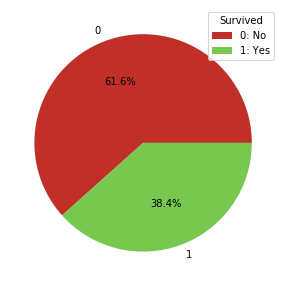

In [219]:
# Survived
Survived = pd.crosstab(df_Train['Survived'],df_Train['Survived']).sum()
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(Survived, labels=Survived.index, autopct='%1.1f%%',colors=colors1)
plt.legend(title='Survived',labels=['0: No','1: Yes'],fontsize=10,title_fontsize=10)

61.6% of the people died and 38.4% of the people survived the sinking of the RMS Titanic

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


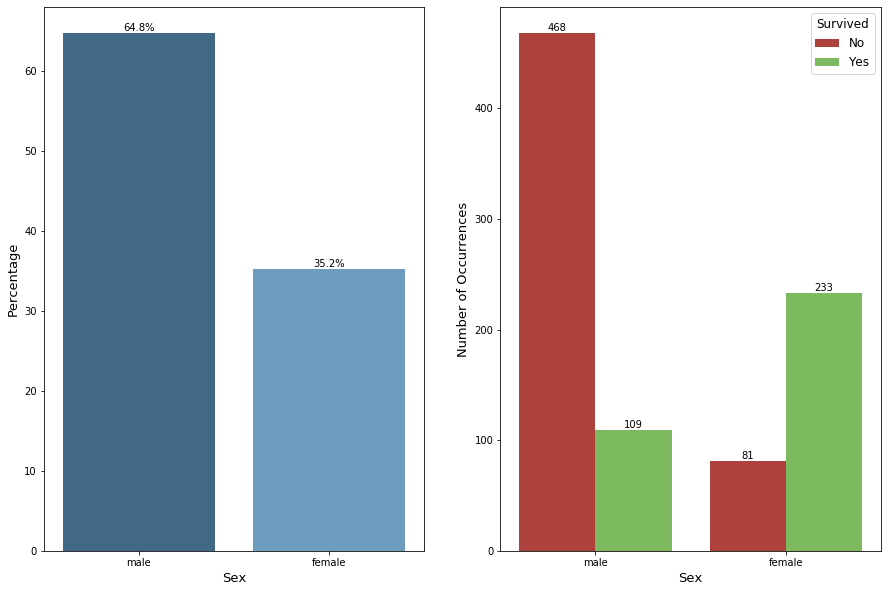

In [220]:
# Sex - Survived
autoplot(df_Train['Sex'],df_Train['Survived'],df_Train,colors1,labels1)
pd.crosstab(df_Train['Sex'], df_Train['Survived']).apply(lambda r: r/r.sum(),axis=1)

- 64.8% of the people were men and 35.2% were women.
- It seems that Sex is an important feature since 74.2% of women survived in comparison with men where only 18.9% survived.

In [221]:
# Embarked
# Taking care the 2 missing values of the feature Embarked by filling the most common value which the port of S: Southampton 
df_Train['Embarked'].value_counts()
df_Train['Embarked'].isnull().sum()
df_Train['Embarked'].fillna('S',inplace=True)

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.660991,0.339009


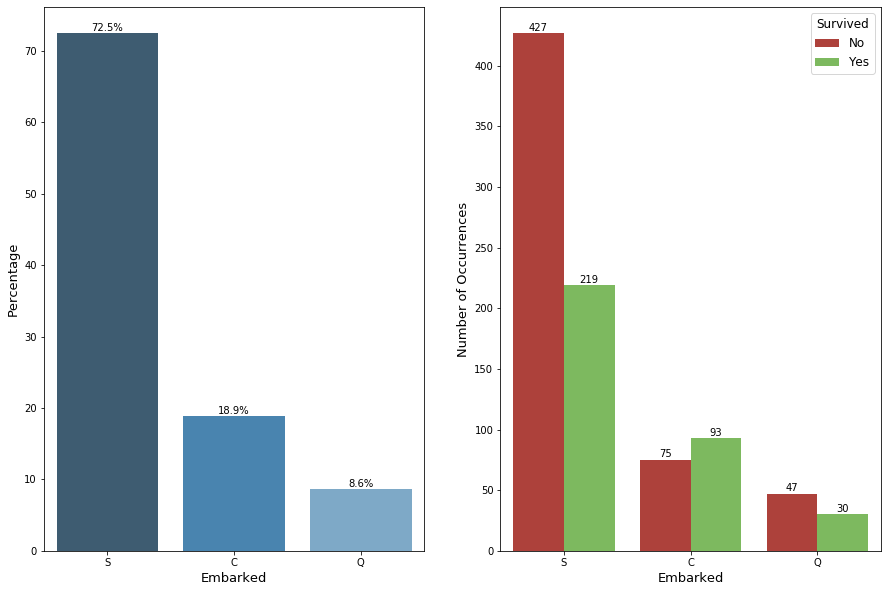

In [222]:
# Embarked - Survived
autoplot(df_Train['Embarked'],df_Train['Survived'],df_Train,colors1,labels1)
pd.crosstab(df_Train['Embarked'], df_Train['Survived']).apply(lambda r: r/r.sum(), axis=1)

72.5% of the people boarded from the port of Southampton which also accounts for the most deaths.
- Southampton: 33.9% of the people boarded from Southampton survived
- Cherbourg: 55.3% of the people boarded from Cherbourg survived
- Queenstown: 38.9% of the people boarded from Queentown survived

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


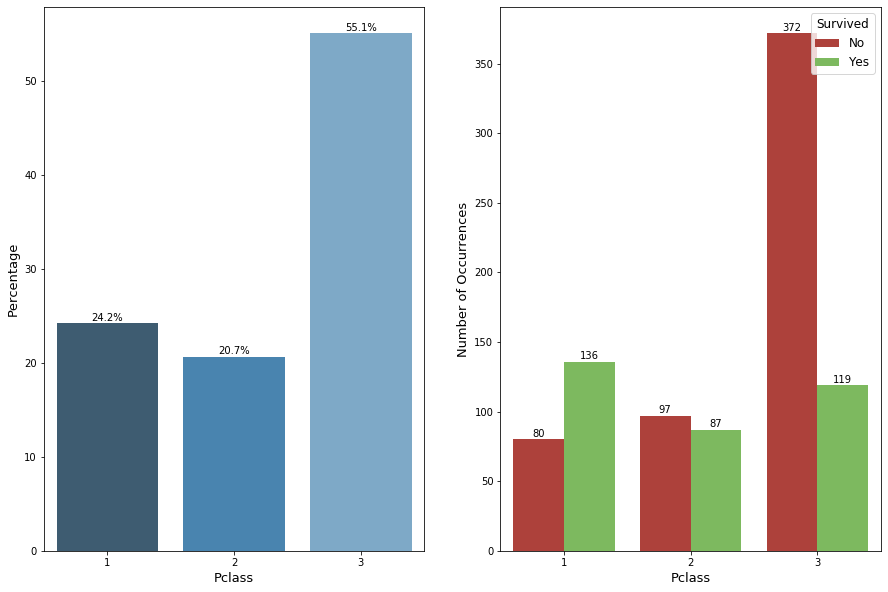

In [223]:
# Pclass - Survived
autoplot(df_Train['Pclass'],df_Train['Survived'],df_Train,colors1,labels1)
pd.crosstab(df_Train['Pclass'], df_Train['Survived']).apply(lambda r: r/r.sum(), axis=1)

- 55.1% of the people had ticket Class 3 while 24.2% had ticket Class 1 and 20.7%  Class 2.
- Ticket Class 3 accounts for the most deaths.
- Pclass 1: 62.9% Survived
- Pclass 2: 47.3% Survived
- Pclass 3: 24.2% Survived
- The higher the class the better chance of survival

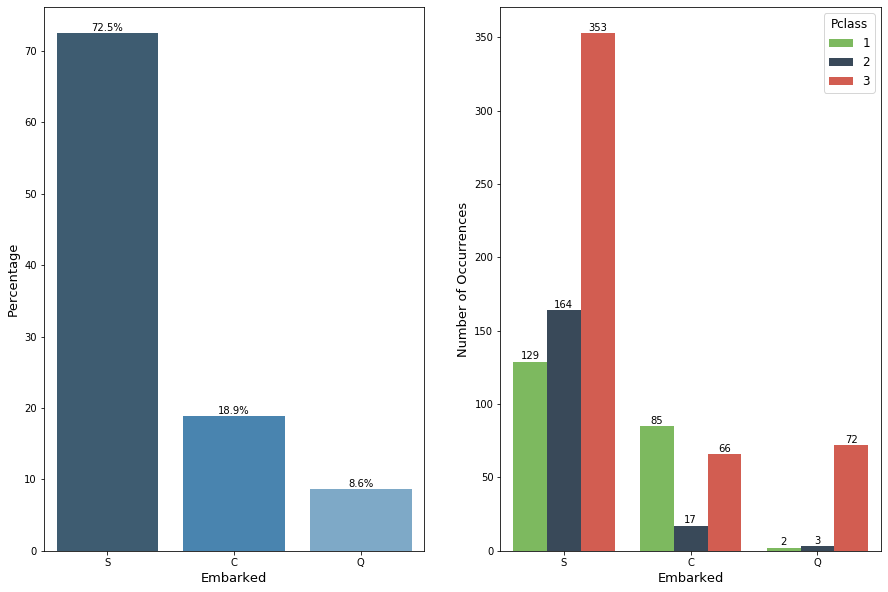

In [224]:
# Embarked - Pclass
autoplot(df_Train['Embarked'],df_Train['Pclass'],df_Train,colors3,labels3)

The right plot shows that most of the people that boarded from the Cherbourg port where in Pclass 1 which has the highest survival percentage. So that can be related to the high perctentage of survival that Cherbourg port has.

### Numerical Features

Survived,0,1
SibSp,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.535714,0.464286
3,0.750000,0.250000
4,0.833333,0.166667
5,1.000000,0.000000
8,1.000000,0.000000


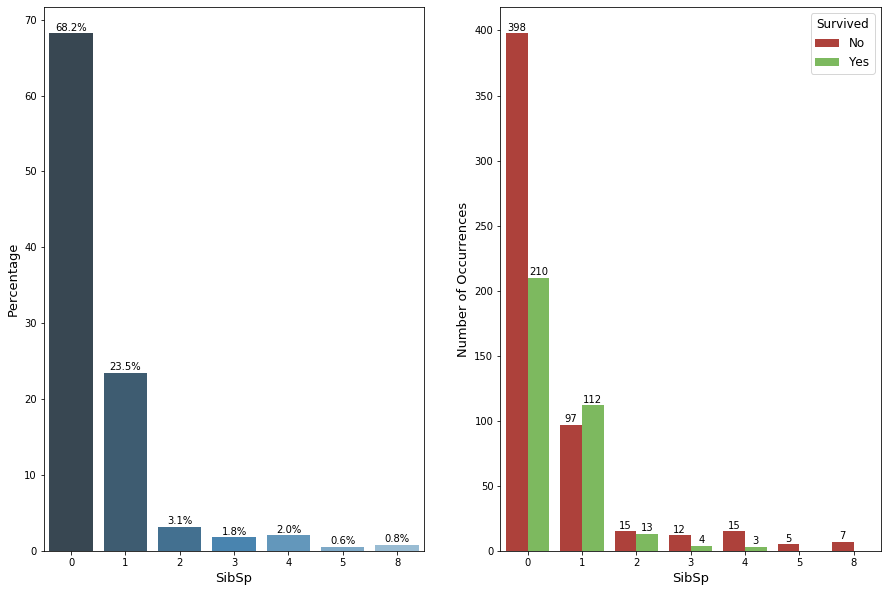

In [225]:
# SibSp - Survived
autoplot(df_Train['SibSp'],df_Train['Survived'],df_Train,colors1,labels1)
pd.crosstab(df_Train['SibSp'], df_Train['Survived']).apply(lambda r: r/r.sum(), axis=1)

- 68.2% had no siblings or spouses aboard the Titanic with a survival percentage of 34.5%.
- 23.5% had 1 sibling or spouse aboard with a significant higher survival percentage of 53.5%

Survived,0,1
Parch,,
0,0.656342,0.343658
1,0.449153,0.550847
2,0.500000,0.500000
3,0.400000,0.600000
4,1.000000,0.000000
5,0.800000,0.200000
6,1.000000,0.000000


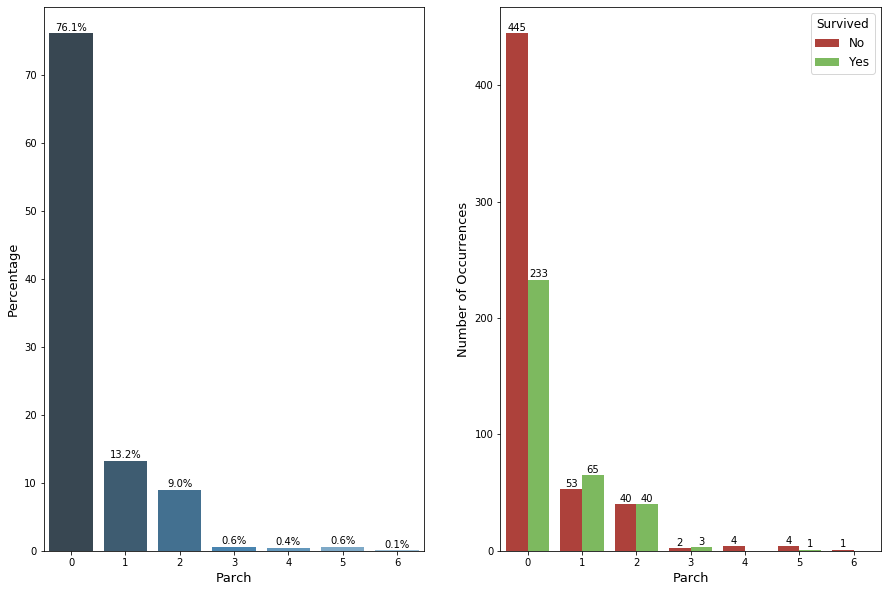

In [226]:
# Parch
autoplot(df_Train['Parch'],df_Train['Survived'],df_Train,colors1,labels1)
pd.crosstab(df_Train['Parch'], df_Train['Survived']).apply(lambda r: r/r.sum(), axis=1)

- 76.1% had no parents or children aboard the Titanic with a survival percentage of 34.3%.
- 13.2% had 1 parent or child aboard with a significant higher survival percentage of 55% and
- 9.0% had 2 parents or children aboard with a survival percentage of 50%.
- It seems that having a family member onboard would give you a better chance of survival.

Mean Fare = 32.20
Median Fare = 14.45


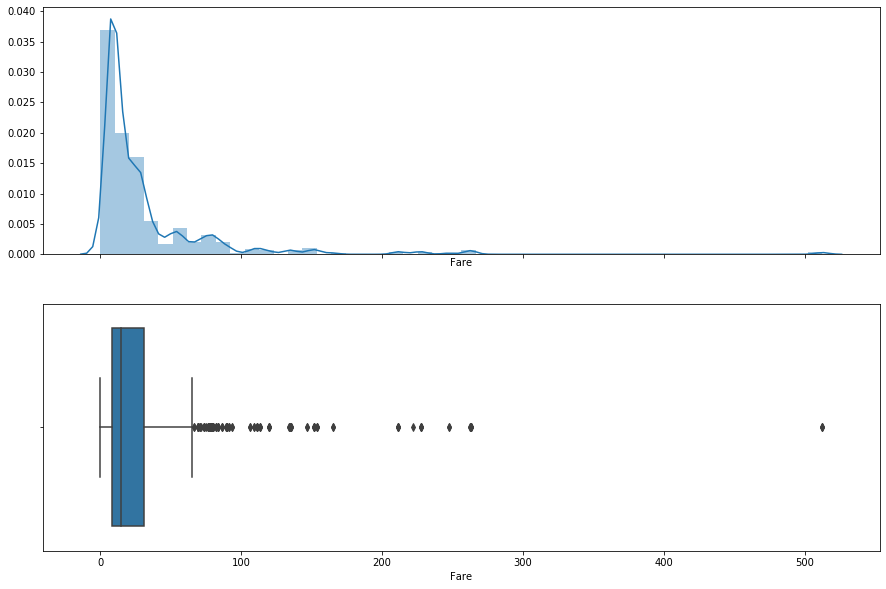

In [227]:
# Fare
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15, 10),sharex=True)
sns.distplot(df_Train['Fare'], ax=ax1)
sns.boxplot(df_Train['Fare'], ax=ax2)
print('Mean Fare = %0.2f\nMedian Fare = %0.2f' % (df_Train['Fare'].mean(),df_Train['Fare'].median()))

- We can see that the Fare feature has many outliers and its distribution is Right-Skewed (Positive Skewness).
- The mean fare is 32.2 and the median fare is 14.45.

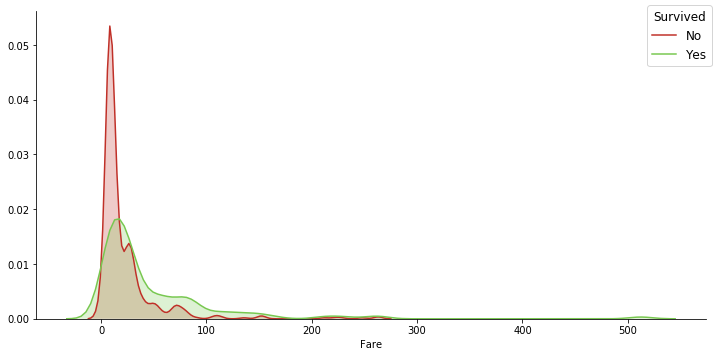

In [228]:
# Fare - Survived
ax = sns.FacetGrid(df_Train, hue='Survived',palette=colors1,aspect=2,height=5)
ax = ax.map(sns.kdeplot, "Fare",shade= True)
ax.fig.legend(title='Survived',labels=['No','Yes'],fontsize=12,title_fontsize=12)

From the plot we can see that the fare distribution for the survived people is wider which might mean that people with higher fares had better chance to survive.

Mean Fare Pclass 1: 84.2 
Mean Fare Pclass 2: 20.7 
Mean Fare Pclass 3: 13.7


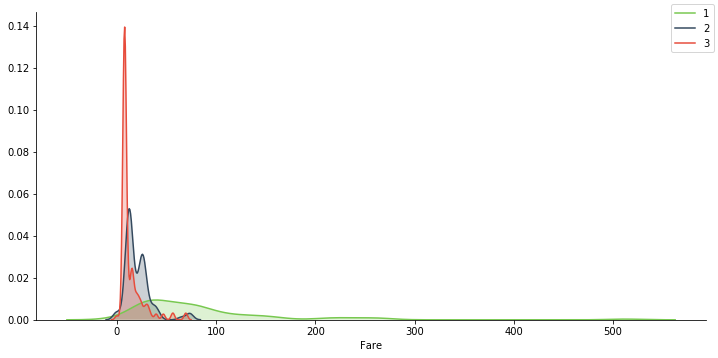

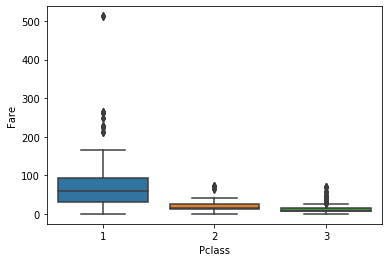

In [229]:
# Fare - Pclass
ax = sns.FacetGrid(df_Train, hue='Pclass',palette=colors3,aspect=2,height=5)
ax = ax.map(sns.kdeplot, "Fare",shade= True)
ax.fig.legend()

fig, ax = plt.subplots()
ax = sns.boxplot(x='Pclass', y='Fare', data=df_Train)

F_1 = df_Train['Fare'][df_Train['Pclass'] == 1].mean()
F_2 = df_Train['Fare'][df_Train['Pclass'] == 2].mean()
F_3 = df_Train['Fare'][df_Train['Pclass'] == 3].mean()
print('Mean Fare Pclass 1: %0.1f \nMean Fare Pclass 2: %0.1f \nMean Fare Pclass 3: %0.1f' % (F_1,F_2,F_3))

We know from the previous plots that the higher the Pclass the better chance to survive but higher Pclass also means higher fare which can be explained from the plots above. Higher fare could also mean having a family member onboard which again gives you a better chance to survive.

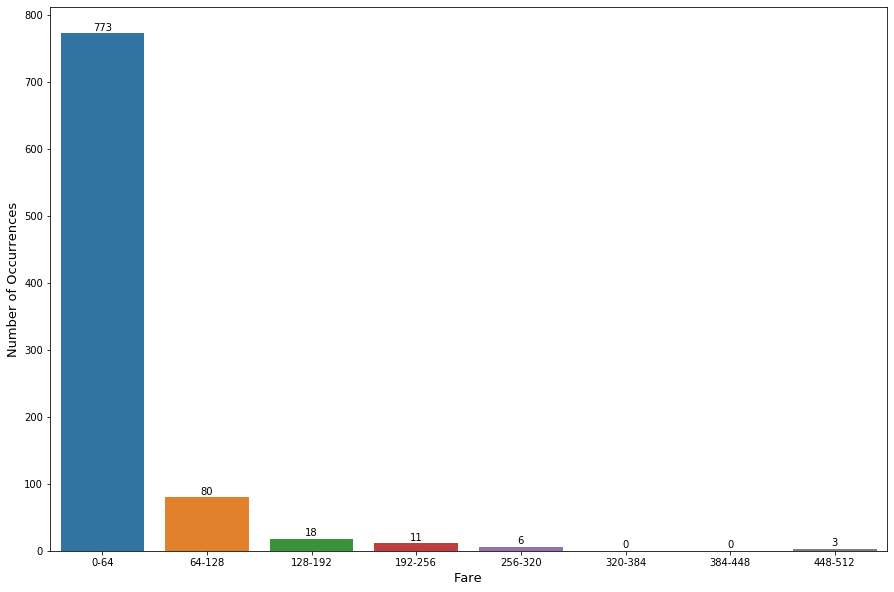

In [230]:
# Fare binned
Fare_binned = pd.Series.copy(df_Train['Fare'])
Fare_binned = pd.cut(Fare_binned,8)
labels = ['0-64','64-128','128-192','192-256','256-320','320-384','384-448','448-512']
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x=Fare_binned.value_counts().index,y=Fare_binned.value_counts(),data=df_Train)
ax.set_xlabel('Fare',fontsize=13)
ax.set_ylabel("Number of Occurrences",fontsize=13)
ax.set_xticklabels(labels)
autolabel(ax.patches,ax,'count')

The plot shows the fare distribution binned. For most people the fare was between 0 and 64.

Mean Age = 29.71
Median Age = 28.00
Age Skew: 0.39


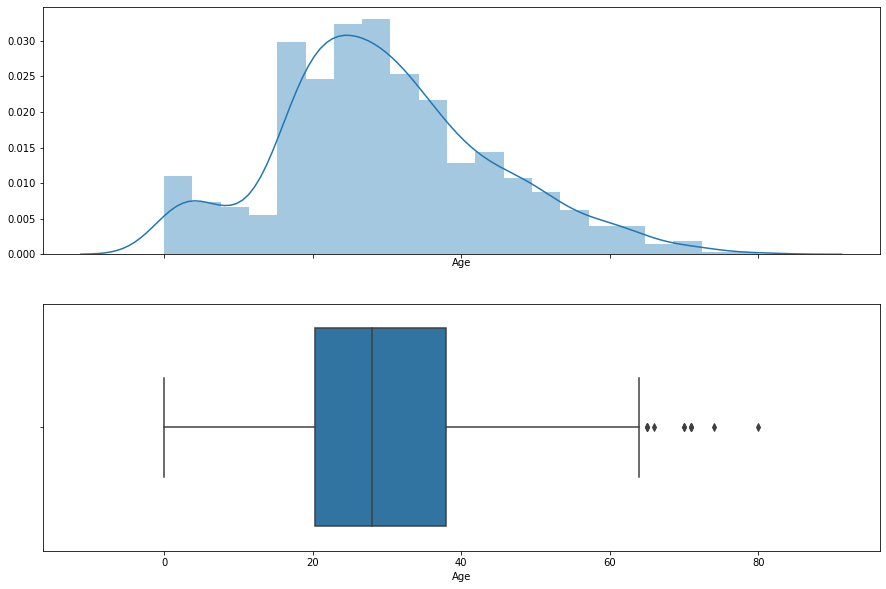

In [231]:
# Age
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15, 10),sharex=True)
sns.distplot(df_Train['Age'], ax=ax1)
sns.boxplot(df_Train['Age'], ax=ax2)
print('Mean Age = %0.2f\nMedian Age = %0.2f' % (df_Train['Age'].mean(),df_Train['Age'].median()))
print('Age Skew: %0.2f' % (df_Train['Age'].skew()))

- The age distribution is a bit Right-Skewed (Positive Skewness) with some outliers and mean age: 29.7, median age: 28.
- We can see a second smaller peak (bell) which corresponds to the many children onboard.

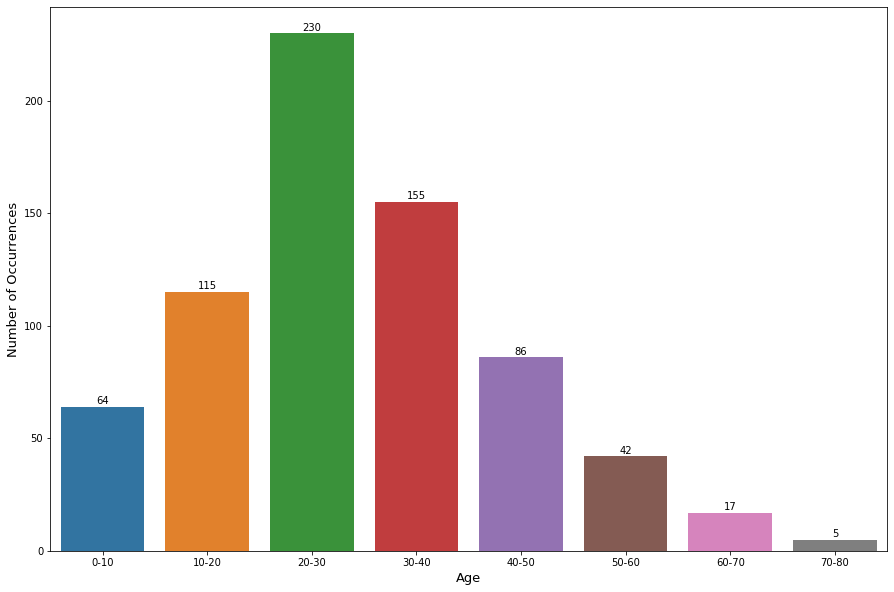

In [232]:
# Age binned
Age_binned = pd.Series.copy(df_Train['Age'])
Age_binned = pd.cut(Age_binned,8)
labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80']
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x=Age_binned.value_counts().index,y=Age_binned.value_counts(),data=df_Train)
ax.set_xlabel('Age',fontsize=13)
ax.set_ylabel("Number of Occurrences",fontsize=13)
ax.set_xticklabels(labels)
autolabel(ax.patches,ax,'count')

A plot of the Age binned with numbers. Most of the passengers fall between tha age 10 and 40 years old.

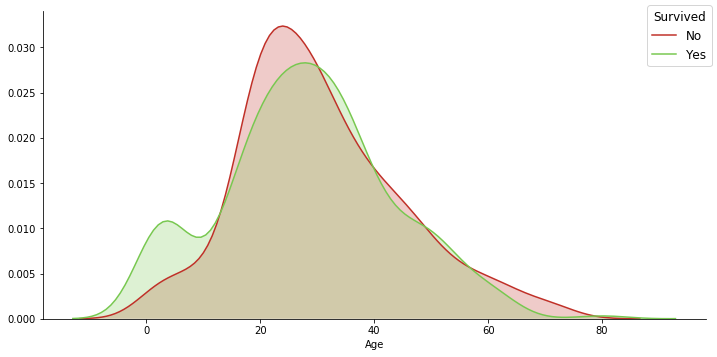

In [233]:
# Age - Survived
ax = sns.FacetGrid(df_Train, hue='Survived',palette=colors1,aspect=2,height=5)
ax = ax.map(sns.kdeplot, "Age",shade=True)
ax.fig.legend(title='Survived',labels=['No','Yes'],fontsize=12,title_fontsize=12)

A noticable second peak in the Age distribution of the Survived indicates that children had a priority since many of them survived.

Mean Age Not Survived: 30.6 
Mean Age Survived: 28.3


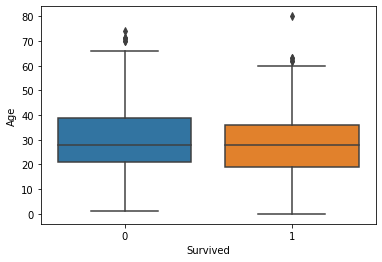

In [234]:
# Age - Survived Boxplot
fig, ax = plt.subplots()
ax = sns.boxplot(x='Survived', y=df_Train['Age'], data=df_Train)
Q1 = df_Train['Age'].quantile(0.25)
Q3 = df_Train['Age'].quantile(0.75)
IQR = Q3 - Q1

th1 = Q1 - 1.5 * IQR
th2 = Q3 + 1.5 * IQR
fliers = df_Train['Age'][(df_Train['Age'] < th1) | (df_Train['Age'] > th2)]

A_0 = df_Train['Age'][df_Train['Survived'] == 0].mean()
A_1 = df_Train['Age'][df_Train['Survived'] == 1].mean()
print('Mean Age Not Survived: %0.1f \nMean Age Survived: %0.1f' % (A_0,A_1))

The mean age is almost similar for those that survived and those who didn't.

Mean Age Men: 30.7 
Mean Age Women: 27.9


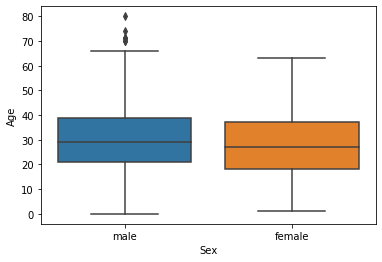

In [235]:
# Age - Sex 
fig, ax = plt.subplots()
ax = sns.boxplot(x='Sex', y=df_Train['Age'], data=df_Train)

F = df_Train['Age'][df_Train['Sex'] == 'female'].mean()
M = df_Train['Age'][df_Train['Sex'] == 'male'].mean()
print('Mean Age Men: %0.1f \nMean Age Women: %0.1f' % (M,F))

The mean age is almost similar for men and women. Sex might not be related with Age.

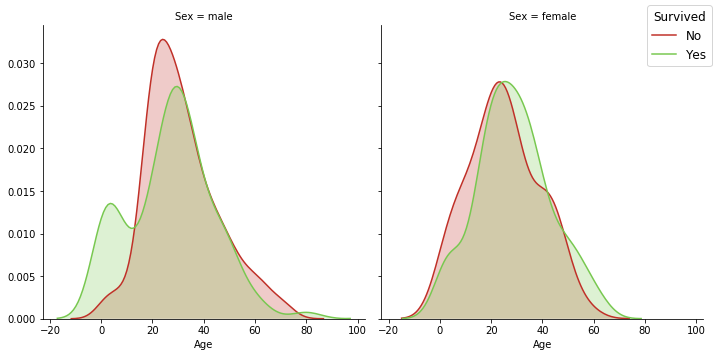

In [236]:
# Age - Sex - Survived
ax = sns.FacetGrid(df_Train,col='Sex', hue='Survived',palette=colors1,height=5)
ax = ax.map(sns.kdeplot, "Age",shade= True)
#ax = ax.map(sns.distplot, "Age")
ax.fig.legend(title='Survived',labels=['No','Yes'],fontsize=12,title_fontsize=12)

From the male distributions we can see that many young boys survived from the second peak.

Mean Age Pclass 1: 38.2
Mean Age Pclass 2: 29.9
Mean Age Pclass 3: 25.2


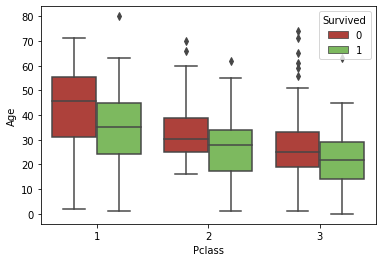

In [237]:
# Age - Pclass Boxplot
fig, ax = plt.subplots()
ax = sns.boxplot(x='Pclass', y='Age',hue='Survived', data=df_Train,palette=colors1)

for i in range(df_Train['Pclass'].nunique()):
    print('Mean Age Pclass %i: %0.1f' %
       (i+1,df_Train['Age'][(df_Train['Pclass'] == i+1)].mean()))

We can see that Age and Pclass are related since the higher the Pclass the higher the mean Age. Also the Age is smaller for the people that Survived in each Pclass probably because there were children among them. 

## 4. Feature Engineering ( Visualization )

### Categorical Features

C:\Users\janel\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\janel\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Survived,0,1
Family,,
0,0.696462,0.303538
1,0.447205,0.552795
2,0.421569,0.578431
3,0.275862,0.724138
4,0.838710,0.161290


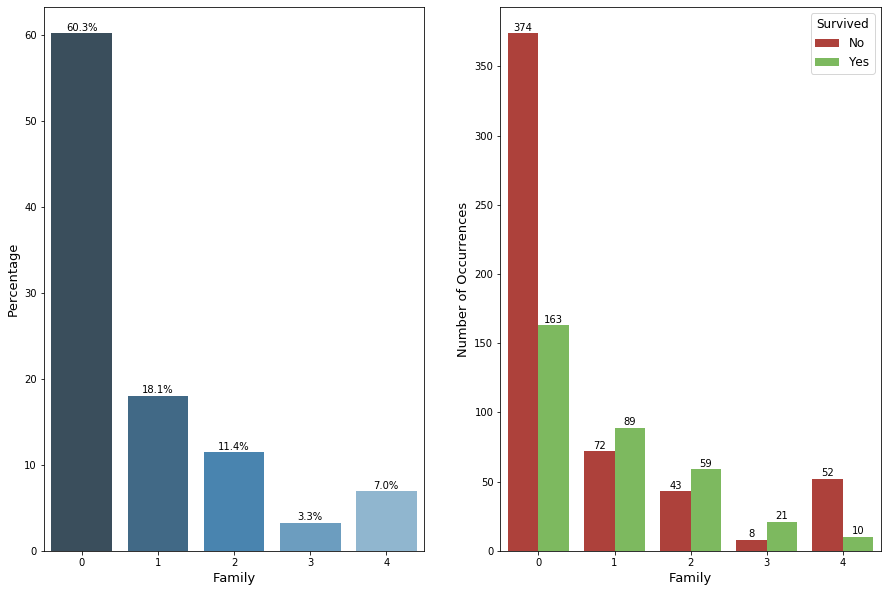

In [238]:
# Family Feature: Combine the features of SibSp and Parch
df_Train["Family"] = df_Train["SibSp"] + df_Train["Parch"]
df_Test["Family"] = df_Test["SibSp"] + df_Test["Parch"]

# Family size above 3 will be signed the number 4
df_Train["Family"][(df_Train["Family"] > 3)] = 4
df_Test["Family"][(df_Test["Family"] > 3)] = 4

# Family
autoplot(df_Train['Family'],df_Train['Survived'],df_Train,colors1,labels1)
pd.crosstab(df_Train['Family'], df_Train['Survived']).apply(lambda r: r/r.sum(), axis=1)

60.3% of the passengers were alone onboard and only 30% of them survived. On the other hand it seems that having 1, 2, or 3 family members gives you a better chance to survive. For large families (4 or more members) the chances are low again but maybe there were a some large families that didn't manage to be saved and account for these numbers.

Mean Age Family 0: 32.2
Mean Age Family 1: 31.4
Mean Age Family 2: 26.1
Mean Age Family 3: 18.3
Mean Age Family 4: 17.8


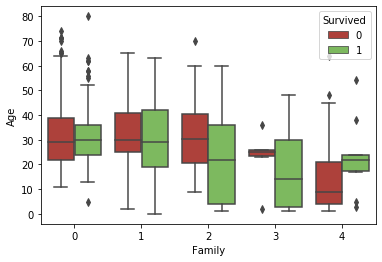

In [239]:
# Age - Family - Survived Boxplot
fig, ax = plt.subplots()
ax = sns.boxplot(x='Family', y='Age',hue='Survived', data=df_Train,palette=colors1)

for i in range(df_Train['Family'].nunique()):
    print('Mean Age Family %i: %0.1f' %
       (i,df_Train['Age'][(df_Train['Family'] == i)].mean()))

Family and Age seem to be related since the Age drops as the family size gets bigger. This can be explained since as the family size gets larger there are more kids among them and the mean Age gets smaller.

Survived,0,1
Deck,,
A,0.533333,0.466667
B,0.255319,0.744681
C,0.406780,0.593220
D,0.242424,0.757576
E,0.250000,0.750000
F,0.384615,0.615385
G,0.500000,0.500000
T,1.000000,0.000000
U,0.700146,0.299854


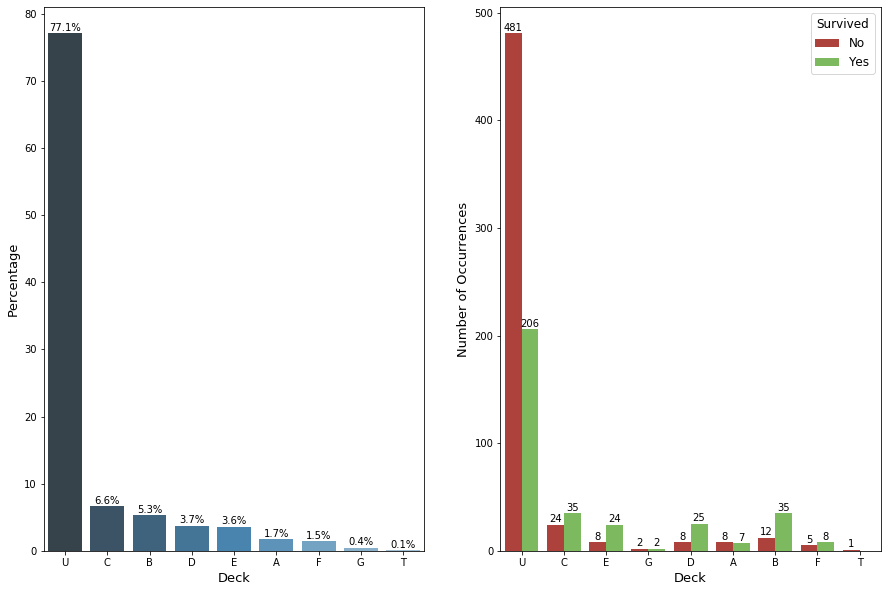

In [240]:
# Cabin feature has 1014 missing values (both Train and Test) and takes alphanumeric values e.g."C23 C25 C27"
# We create the Deck feature for both Train Set and Test Set by extracting the first letter of the Cabin feature
# and filling missing information with the letter U: Unknown.
# Deck Feature
df_Train['Deck'] = df_Train['Cabin'].str[:1]
df_Test['Deck'] = df_Test['Cabin'].str[:1]

df_Train['Deck'].isna().sum()
df_Test['Deck'].isna().sum()
df_Train['Deck'] = df_Train['Deck'].fillna('U')
df_Test['Deck'] = df_Test['Deck'].fillna('U')

# Deck
autoplot(df_Train['Deck'],df_Train['Survived'],df_Train,colors1,labels1)
pd.crosstab(df_Train['Deck'], df_Train['Survived']).apply(lambda r: r/r.sum(), axis=1)

Most of the Cabin values are missing, actually for 77.1% of the passengers. Only 29.9% of the passengers assigned Unknown deck survived. Passenger of other decks have better chance of survival.

Survived,0,1
Title,,
Master,0.425000,0.575000
Miss,0.302198,0.697802
Mr,0.843327,0.156673
Mrs,0.208000,0.792000
Other,0.555556,0.444444


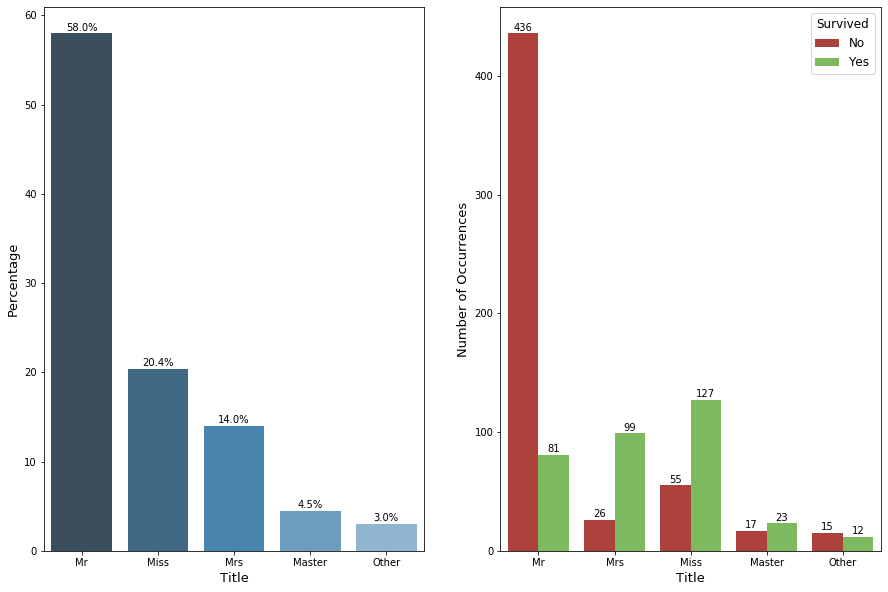

In [241]:
# Name Feature includes the first name, last name and title information of each passenger.
# We create the Title feature which has meaning for our model by extracting the title info for each passenger
# Title takes 17 unique values, we keep the 4 most frequent ones and name all the others with the Title: "Other"
df_Train['Title'] = df_Train['Name'].str.split(', ').str[1].str.split('.').str[0]
df_Test['Title'] = df_Test['Name'].str.split(', ').str[1].str.split('.').str[0]

df_Train['Title'].value_counts()

df_Train["Title"] = df_Train["Title"].replace(['Dr', 'Rev','Col','Major', 'Col','Jonkheer','Dona','Don',
                                               'the Countess', 'Lady', 'Capt', 'Sir','Ms','Mlle','Mme'], 'Other')
df_Test["Title"] = df_Test["Title"].replace(['Dr', 'Rev','Col','Major', 'Col','Jonkheer','Dona','Don',
                                               'the Countess', 'Lady', 'Capt', 'Sir','Ms','Mlle','Mme'], 'Other')

# Title
autoplot(df_Train['Title'],df_Train['Survived'],df_Train,colors1,labels1)
pd.crosstab(df_Train['Title'], df_Train['Survived']).apply(lambda r: r/r.sum(), axis=1)

Title is related with Sex and we can see that 58% had title Mr as long as a low chance to survive since only 15.6% survived.
Women on the other hand and Masters (usually for young boys) has much better percentages of survival. Mrs: 79.2%, Miss: 69.7%, Master: 57.5% 

## 5. Feature Engineering ( Encoding )

In [242]:
# Drop no needed columns
df_Train = df_Train.drop(columns=['PassengerId','Name','SibSp','Parch','Ticket','Cabin'])

# Dataset split to Categorical (Nominal,Ordinal,Binary) and Numeric Vars
df_Cat_Bin = df_Train[['Sex']].iloc[:]
df_Cat_Nom = df_Train[['Embarked','Title','Deck','Family']].iloc[:]
df_Cat_Ord = df_Train[['Pclass']].iloc[:]
df_Num = df_Train[['Age','Fare']].iloc[:]

# Categorical Output
y = df_Train['Survived'].iloc[:]

In [243]:
# LABEL ENCODING - ONE HOT ENCODING CATEGORICAL FEATURES

# Categorical Binary Features Encoding
df_Cat_Bin_Ld = df_Cat_Bin.replace({'male': 0, 'female': 1})

# Categorical Nominal Features Encoding
df_Cat_Nom_OHEd = pd.get_dummies(df_Cat_Nom.astype('str'))

# Categorical Ordinal Features Encoding
df_Cat_Ord_OHEd = pd.get_dummies(df_Cat_Ord.astype('str'))

# All Categorical Features
df_Cat = pd.concat([df_Cat_Bin_Ld,df_Cat_Nom_OHEd,df_Cat_Ord_OHEd],axis=1)

In [244]:
# ALL the Selected IVs
X = pd.concat([df_Num,df_Cat],axis=1)
columns=X.columns
X.head(10)

,Age,Fare,Sex,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Deck_T,Deck_U,Family_0,Family_1,Family_2,Family_3,Family_4,Pclass_1,Pclass_2,Pclass_3
0,22.0,7.2500,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
1,38.0,71.2833,1,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,26.0,7.9250,1,0,0,1,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1
3,35.0,53.1000,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
4,35.0,8.0500,0,0,0,1,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
5,NaN,8.4583,0,0,1,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
6,54.0,51.8625,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
7,2.0,21.0750,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
8,27.0,11.1333,1,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
9,14.0,30.0708,1,1,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0


We ended with 28 features after the encoding, still we need to impute the missing values in the Age feature and fix the skewness in the Fare feature. This will be done after we split our Train (Titanic) dataset into train and test. We do this in order to avoid information passing to from the training set to the testing set. 
To sum up, we build and evaluate our model based on the Train data provided by splitting them again in train and test sets and  then we use the developed model on the whole Train data provided and predict for the Test data.

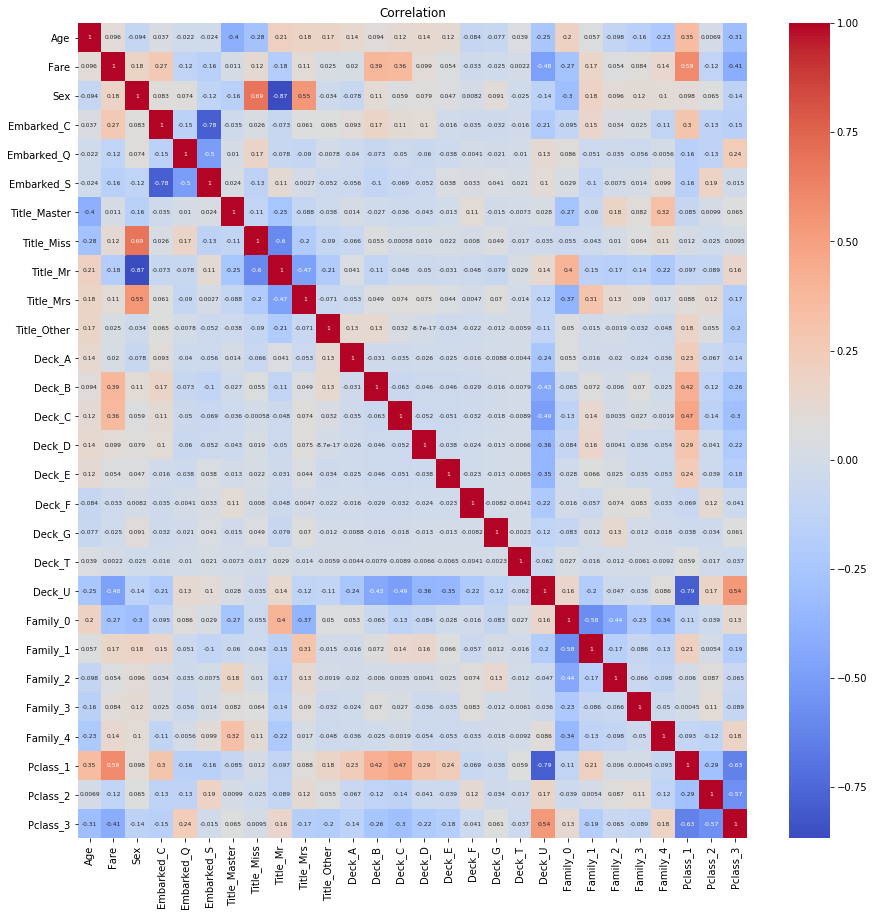

In [245]:
# Correlation Matrix
corr = X.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,cmap = "coolwarm",annot=True,annot_kws = {'size': 6})
plt.title("Correlation")
plt.show()

The correlation between Sex and Title features is obvious as well as Pclass with Deck and Fare.

In [246]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [247]:
# Age Imputing: Taking care of missing values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
X_train = pd.DataFrame(data = imputer.fit_transform(X_train),
                                 columns = X_train.columns,
                                 index = X_train.index)
X_test = pd.DataFrame(data = imputer.fit_transform(X_test),
                                 columns = X_test.columns,
                                 index = X_test.index)

In [248]:
# Fix Fare skewness
print('Fare Train Skew: %0.2f \nFare Test Skew: %0.2f' %
       (X_train['Fare'].skew(),X_test['Fare'].skew()))

# Using log
X_train['Fare'] = np.log(X_train['Fare'] + 1)
X_test['Fare'] = np.log(X_test['Fare'] + 1)

print('Fare Train Fixed Skew: %0.2f \nFare Test fixed Skew: %0.2f' %
       (X_train['Fare'].skew(),X_test['Fare'].skew()))

Fare Train Skew: 5.19 
Fare Test Skew: 2.98
Fare Train Fixed Skew: 0.38 
Fare Test fixed Skew: 0.44


In [249]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [250]:
# Choosing Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [251]:
# Used GridSearchCV for parameter tuning
CF = [None]*9
Names = ['Logistic Regression','SVM linear','SVM rbf','Naive Bayes','kNN','Decision Tree','Random Forest','Gradient Boosting','Ada Boost']
CF[0] = LogisticRegression(penalty='l2',solver='newton-cg')
CF[1] = SVC(kernel = 'linear', random_state = 0,probability=True)
CF[2] = SVC(kernel = 'rbf', random_state = 0,probability=True)
CF[3] = GaussianNB()
CF[4] = KNeighborsClassifier(n_neighbors=15,leaf_size=10,metric='manhattan')
CF[5] = DecisionTreeClassifier(max_depth = 3, min_samples_split = 4,min_samples_leaf=2,random_state = 0)
CF[6] = RandomForestClassifier(n_estimators=300,max_depth=5,min_samples_split=7,min_samples_leaf=2,random_state = 0)
CF[7] = GradientBoostingClassifier(learning_rate=0.05,min_samples_leaf=2,random_state = 0)
CF[8] = AdaBoostClassifier(random_state = 0)

We first used GridSearchCV to tune some of hyperparameters.

In [252]:
# Classification Metrics
Classifiers = ['Logistic Regression','SVM linear','SVM rbf','Naive Bayes','k-NN','Decision Tree','Random Forest','Gradient Boosting','Ada Boost']
Cols = ['Accuracy','Recall','Precision','f1 score','AUC ROC score']
Scores = pd.DataFrame(index=Classifiers,columns=Cols).astype('float')
for i in range(len(CF)):
    classifier = CF[i]
    classifier.fit(X_train, y_train)
    c_probs = classifier.predict_proba(X_test)
    c_probs = c_probs[:, 1]
    
    y_pred = classifier.predict(X_test)
    
    from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
    Scores.Accuracy[i] = accuracy_score(y_test,y_pred)
    Scores.Recall[i] = recall_score(y_test,y_pred)
    Scores.Precision[i] = precision_score(y_test,y_pred)
    Scores['f1 score'][i] = f1_score(y_test,y_pred)
    Scores['AUC ROC score'][i] = roc_auc_score(y_test,c_probs)
    
print(Scores)

                     Accuracy    Recall  Precision  f1 score  AUC ROC score
Logistic Regression  0.837989  0.797101   0.785714  0.791367       0.898155
SVM linear           0.821229  0.739130   0.784615  0.761194       0.791831
SVM rbf              0.815642  0.753623   0.764706  0.759124       0.857708
Naive Bayes          0.715084  0.927536   0.581818  0.715084       0.863109
k-NN                 0.826816  0.739130   0.796875  0.766917       0.890316
Decision Tree        0.793296  0.768116   0.716216  0.741259       0.818050
Random Forest        0.826816  0.768116   0.779412  0.773723       0.904216
Gradient Boosting    0.826816  0.710145   0.816667  0.759690       0.902437
Ada Boost            0.815642  0.797101   0.743243  0.769231       0.871739


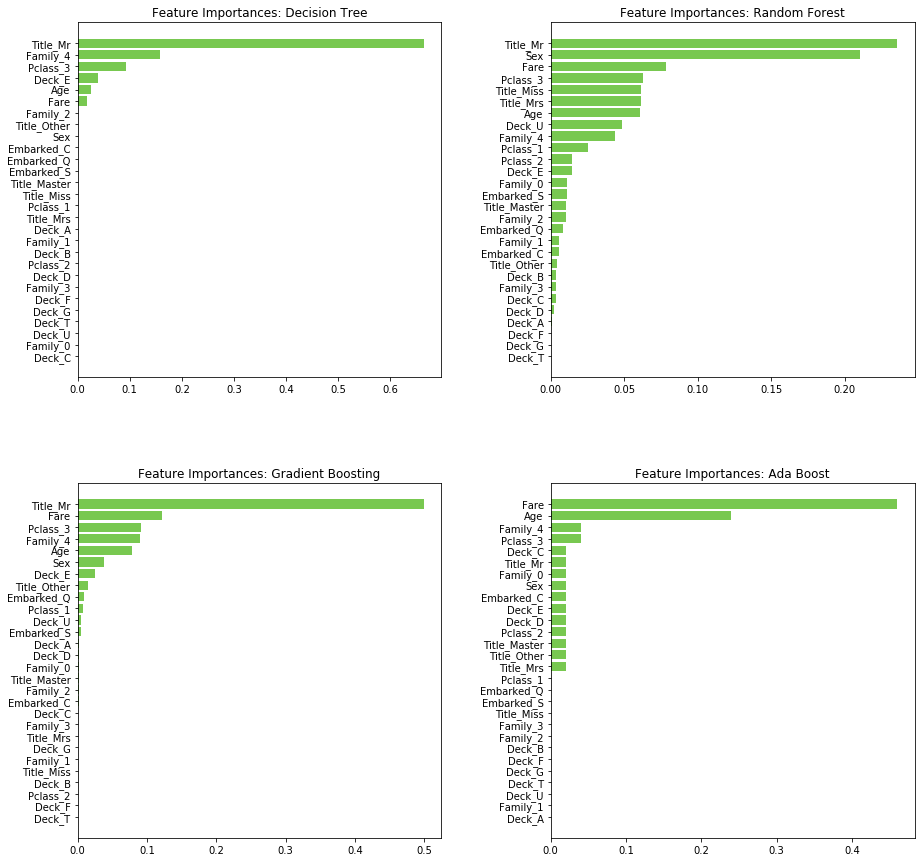

In [253]:
# Feature Importance plots
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(4):
    plt.subplot(2, 2, i+1)
    classifier = CF[i+5]
    classifier.fit(X_train, y_train)     

    FImportances = pd.DataFrame(data=classifier.feature_importances_,index=columns,columns=['Importance']).sort_values(by=['Importance'])
    plt.barh(range(FImportances.shape[0]),FImportances['Importance'],color = '#78C850')
    plt.yticks(range(FImportances.shape[0]), FImportances.index)
    plt.title('Feature Importances: %s' % (Names[i+5]))

Feature Importances are different for each of the 4 classifiers but they all share some common features with significant importances like Title_Mr, Fare, Pclass_3 and Age.

## 6. Evaluation

#### Receiver Operating Characteristic (ROC) Curve
The Receiver Operating Characteristic Curve, better known as the ROC Curve, is an excellent method for measuring the performance of a Classification model. It tells how much model is capable of distinguishing between classes. The True Positive Rate (TPR) is plot against False Positive Rate (FPR) for the probabilities of the classifier predictions. Then, the area under the plot is calculated.

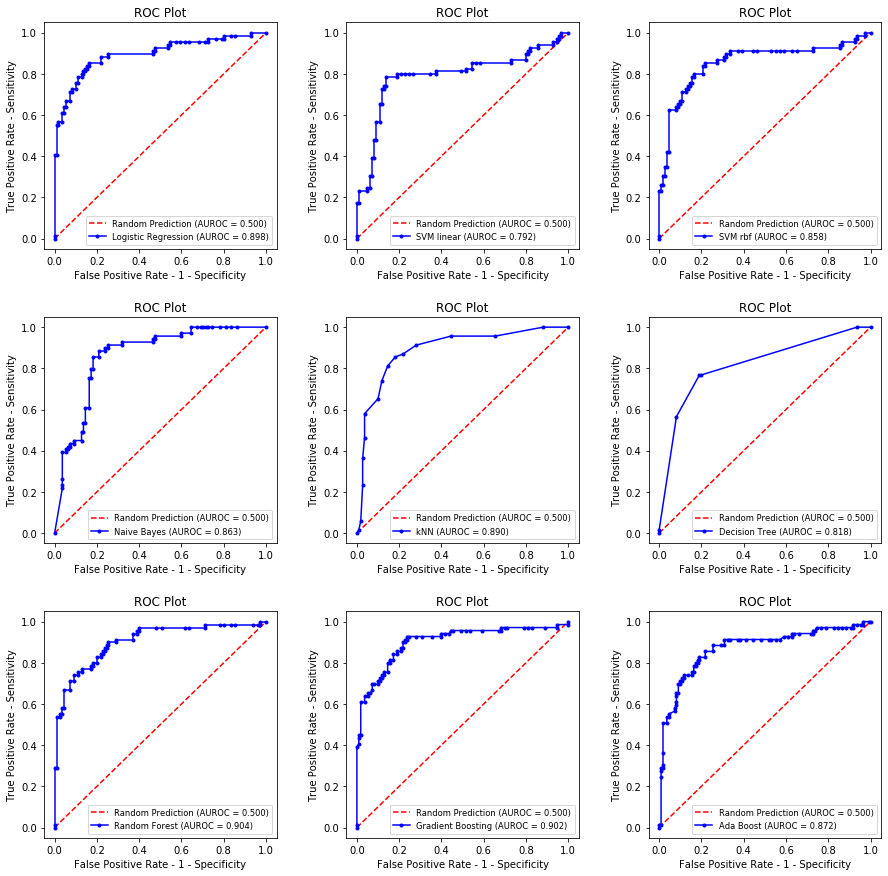

In [254]:
# ROC - Curves for models
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.3, wspace=0.3)    
for i in range(len(CF)):
    plt.subplot(3, 3, i+1)
    #i=4
    classifier = CF[i]
    classifier.fit(X_train, y_train)  
     
    # Predict probabilities
    r_probs = [0 for _ in range(len(y_test))]
    c_probs = classifier.predict_proba(X_test)

    # Keep probabilities for the positive outcome only
    c_probs = c_probs[:, 1]

    # Calculate AUROC
    from sklearn.metrics import roc_curve, roc_auc_score, auc
    r_auc = roc_auc_score(y_test, r_probs)
    c_auc = roc_auc_score(y_test, c_probs)
    #print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
    #print('%s: AUROC = %.3f' % (Names[i],c_auc))

    # Calculate ROC curve
    r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
    c_fpr, c_tpr, _ = roc_curve(y_test, c_probs)
    plt.plot(r_fpr, r_tpr, linestyle='--',c='r', label='Random Prediction (AUROC = %0.3f)' % r_auc)
    plt.plot(c_fpr, c_tpr, marker='.',c='b', label='%s (AUROC = %0.3f)' % (Names[i],c_auc))

    plt.title('ROC Plot')
    plt.xlabel('False Positive Rate - 1 - Specificity')
    plt.ylabel('True Positive Rate - Sensitivity')
    plt.legend(fontsize='small')

The higher the AUC, the better the model is at distinguishing between survived passengers and not survived passengers.
Random Forest Classifier and Gradient Boosting have the highest AUC with 0.904 and 0.902 respectively. Logistic Regression is very close with AUC = 0.898.

#### Cumulative Accuracy Profile (CAP) Curve
The CAP Curve tries to analyse how to effectively identify all data points of a given class using minimum number of tries.

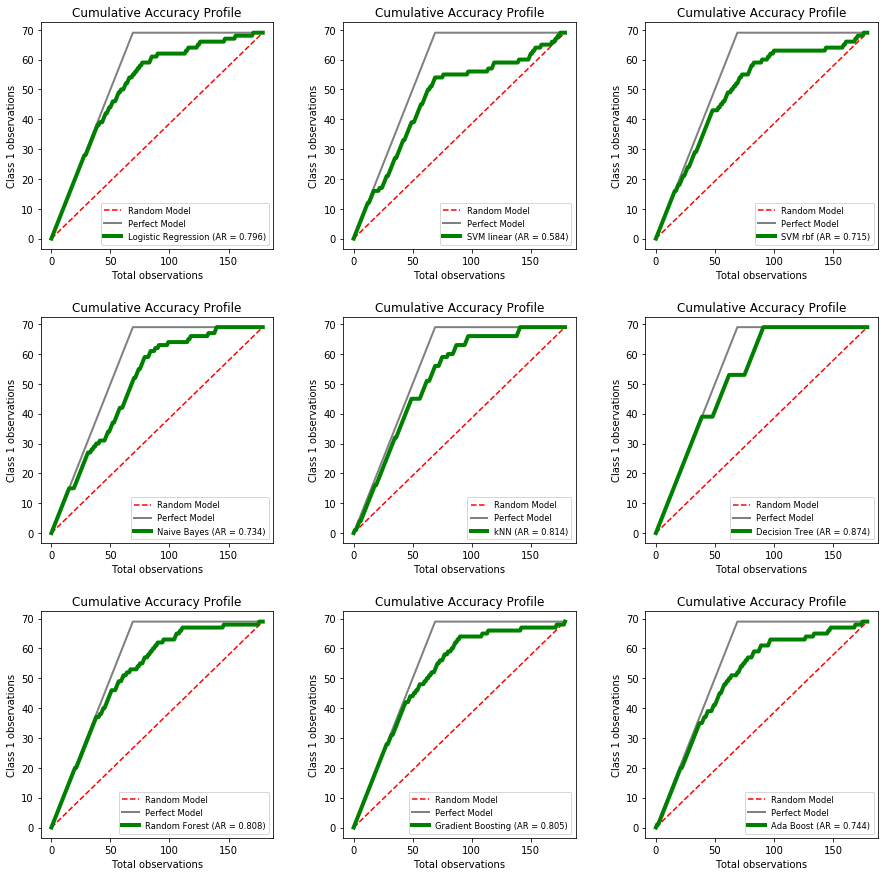

In [255]:
# Cap Curve
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.3, wspace=0.3)    
for i in range(len(CF)):
    plt.subplot(3, 3, i+1)
    
    total = len(y_test)
    class_1_count = np.sum(y_test)
    class_0_count = total - class_1_count

    plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')

    plt.plot([0, class_1_count, total], 
             [0, class_1_count, class_1_count], 
             c = 'grey', linewidth = 2, label = 'Perfect Model')

    classifier = CF[i]
    classifier.fit(X_train, y_train)  
    c_probs = classifier.predict_proba(X_test)

    # Keep probabilities for the positive outcome only
    c_probs = c_probs[:, 1]

    model_y = [y for _, y in sorted(zip(c_probs, y_test), reverse = True)]
    y_values = np.append([0], np.cumsum(model_y))
    x_values = np.arange(0, total + 1)

    from sklearn.metrics import auc
    # Area under Random Model
    a = auc([0, total], [0, class_1_count])

    # Area between Perfect and Random Model
    aP = auc([0, class_1_count, total], [0, class_1_count, class_1_count]) - a

    # Area between Trained and Random Model
    aR = auc(x_values, y_values) - a

    AR = aR / aP

    plt.plot(x_values, y_values, c = 'g', label = '%s (AR = %0.3f)' % (Names[i],AR), linewidth = 4)

    # Plot information
    plt.xlabel('Total observations')
    plt.ylabel('Class 1 observations')
    plt.title('Cumulative Accuracy Profile')
    plt.legend(fontsize='small')

Decision Tree has the highest AUC with 0.874 and then Random Forest and Gradient Boosting follow with 0.808 and 0.805 respectively. Logistic Regression is very close with AUC = 0.796.

As an conclusion our choice would fall between the Random Forest and Gradient Boosting.

Best Score after submission: 0.79425 using the Random Forest Classifier --> position 3852/24648 top 15%